# AICC2023 CH4

Min age: -66.0
Max age: 799638.323636364
Window 500 → min=-153.990, max=405.378
Window 600 → min=-148.527, max=416.840
Window 700 → min=-141.954, max=426.211
Window 800 → min=-134.317, max=433.112
Window 900 → min=-127.327, max=439.720
Window 1000 → min=-121.001, max=445.299
Window 1100 → min=-114.573, max=450.636
Window 1200 → min=-107.799, max=453.957
Window 1300 → min=-101.475, max=455.714
Window 1400 → min=-95.824, max=456.351
Window 1500 → min=-90.480, max=455.715
Window 1600 → min=-85.915, max=454.830
Window 1700 → min=-86.988, max=454.240
Window 1800 → min=-89.909, max=451.536
Window 1900 → min=-92.419, max=448.665
Window 2000 → min=-94.605, max=445.479
Window 2100 → min=-96.310, max=442.606
Window 2200 → min=-99.189, max=440.370
Window 2300 → min=-100.455, max=437.913
Window 2400 → min=-101.403, max=443.608
Window 2500 → min=-102.103, max=450.119
Window 2600 → min=-102.499, max=452.519
Window 2700 → min=-102.989, max=451.455
Window 2800 → min=-104.427, max=450.786
Window 2900 →

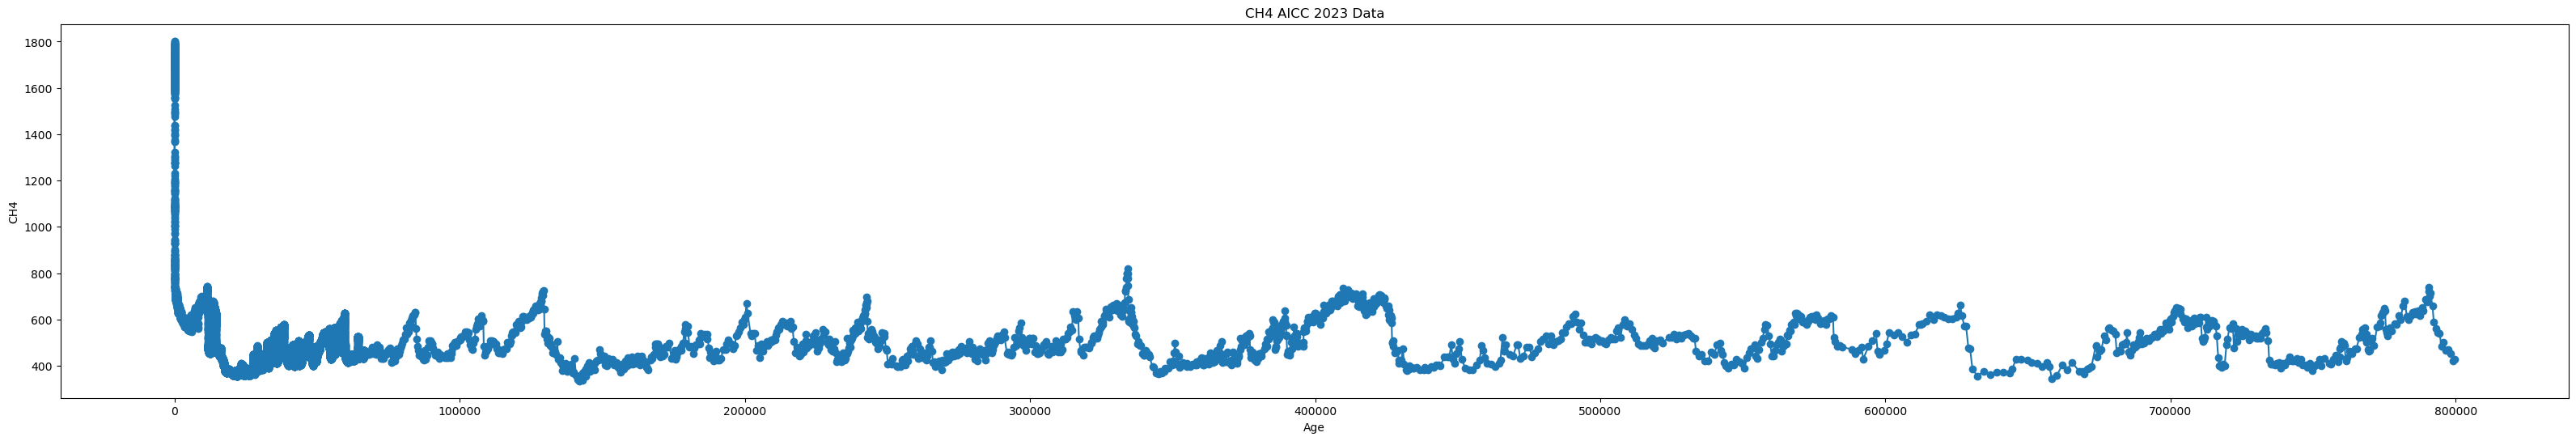

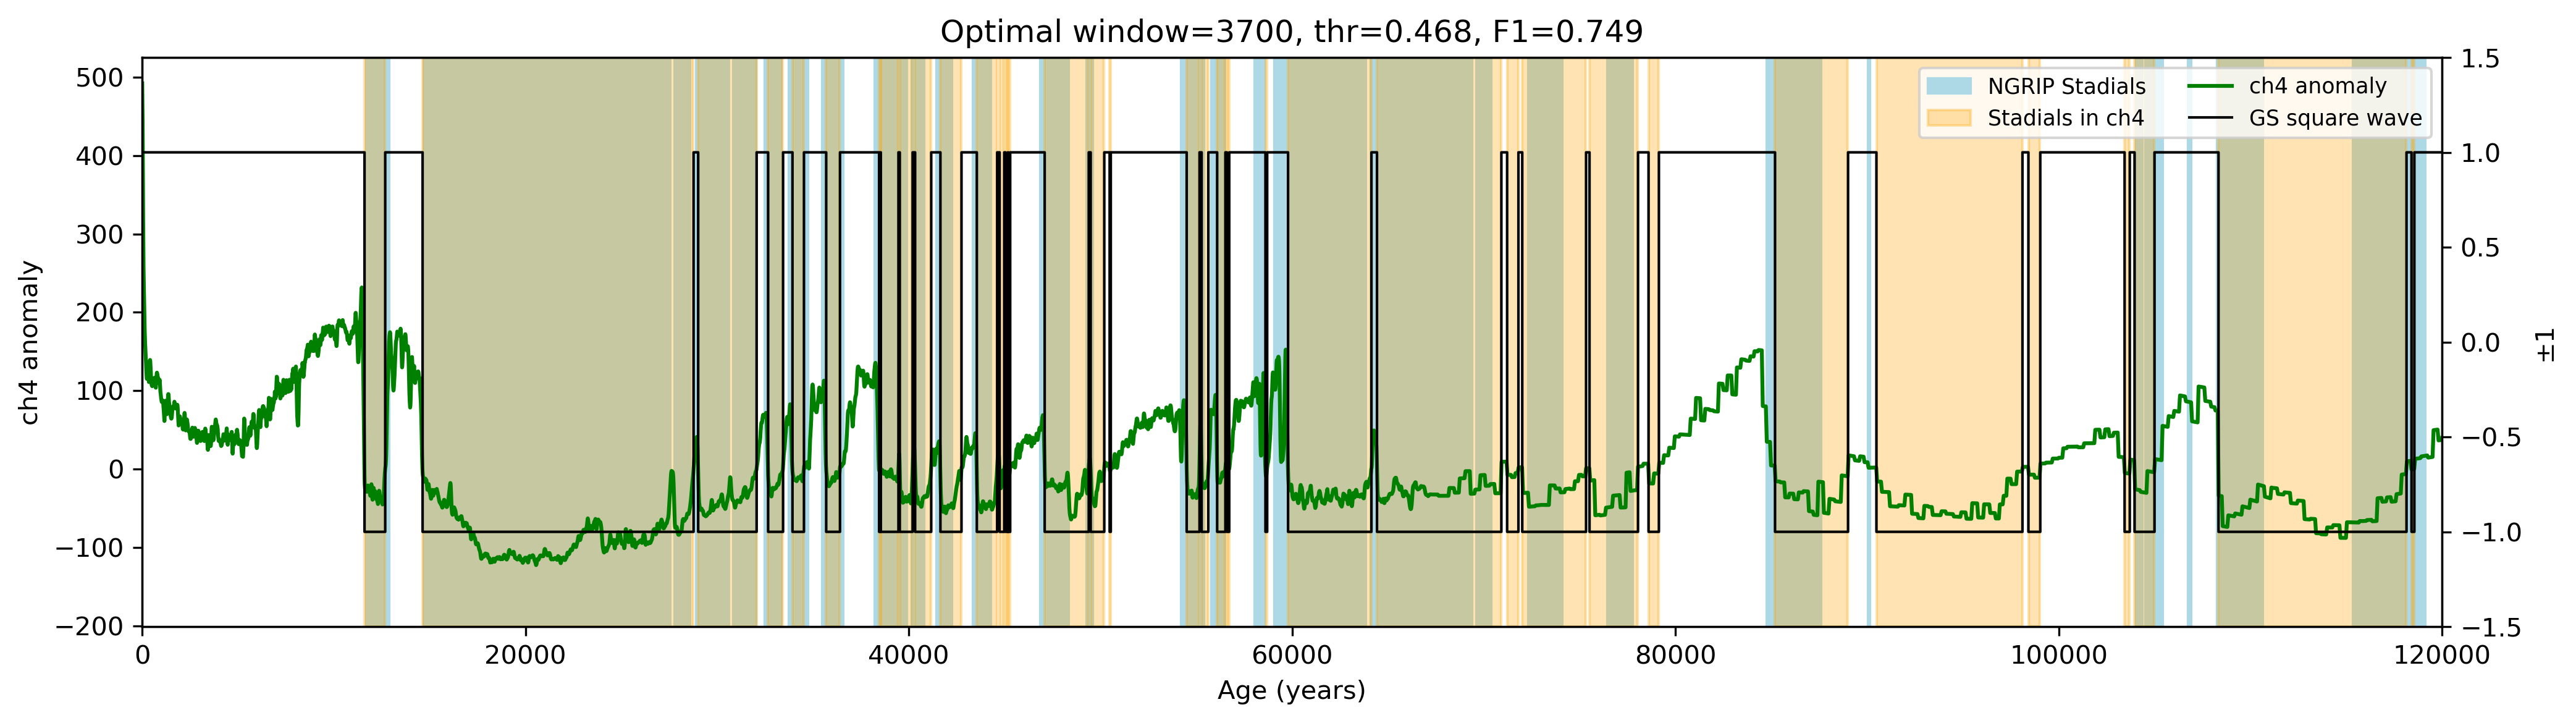

Text(0, 0.5, 'CH4')

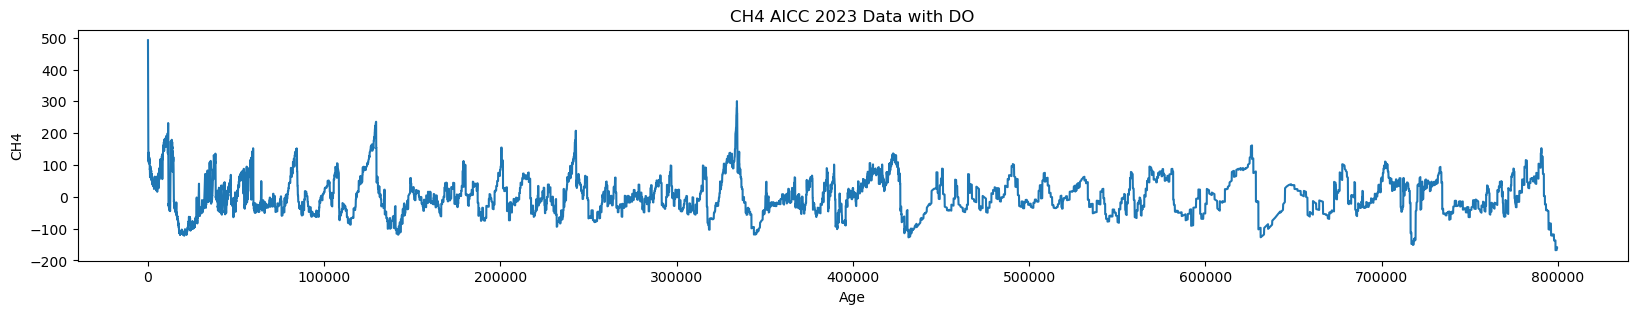

In [1]:
# read 'CH4_AICC2023.xlsx' from other_data/
import pandas as pd

df = pd.read_excel('other_data/CH4_AICC2023.xlsx', sheet_name='Sheet1')
df

# plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 6))
plt.plot(df['age'], df['ch4'], marker='o', linestyle='-')
plt.title('CH4 AICC 2023 Data')
plt.xlabel('Age')
plt.ylabel('CH4')

# print the min and max of age
print('Min age:', df['age'].min())
print('Max age:', df['age'].max())


from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)
import pandas as pd


new_df, df_sq, best = sa.build_DO_sq(df, if_plot=True, age_start=0, age_end=799630, extra_sm=5, dir='lt')

# plot new_df with figure size 20x3
plt.figure(figsize=(20, 3))
plt.plot(new_df['age'], new_df['ch4'], marker='', linestyle='-')
plt.title('CH4 AICC 2023 Data with DO')
plt.xlabel('Age')
plt.ylabel('CH4')

In [7]:
df

,age,ch4
0,-66.000000,1787.38
1,-65.916700,1787.38
2,-65.833300,1795.75
3,-65.750000,1801.46
4,-65.666700,1802.71
...,...,...
31916,796449.565455,466.00
31917,797424.556364,470.00
31918,798229.243636,451.00
31919,799195.094545,420.00


In [6]:
new_df

,age,ch4
0,0,359.611600
1,10,335.257778
2,20,315.447753
3,30,268.548402
4,40,225.453932
...,...,...
79958,799580,0.073055
79959,799590,0.275512
79960,799600,0.481554
79961,799610,0.584552


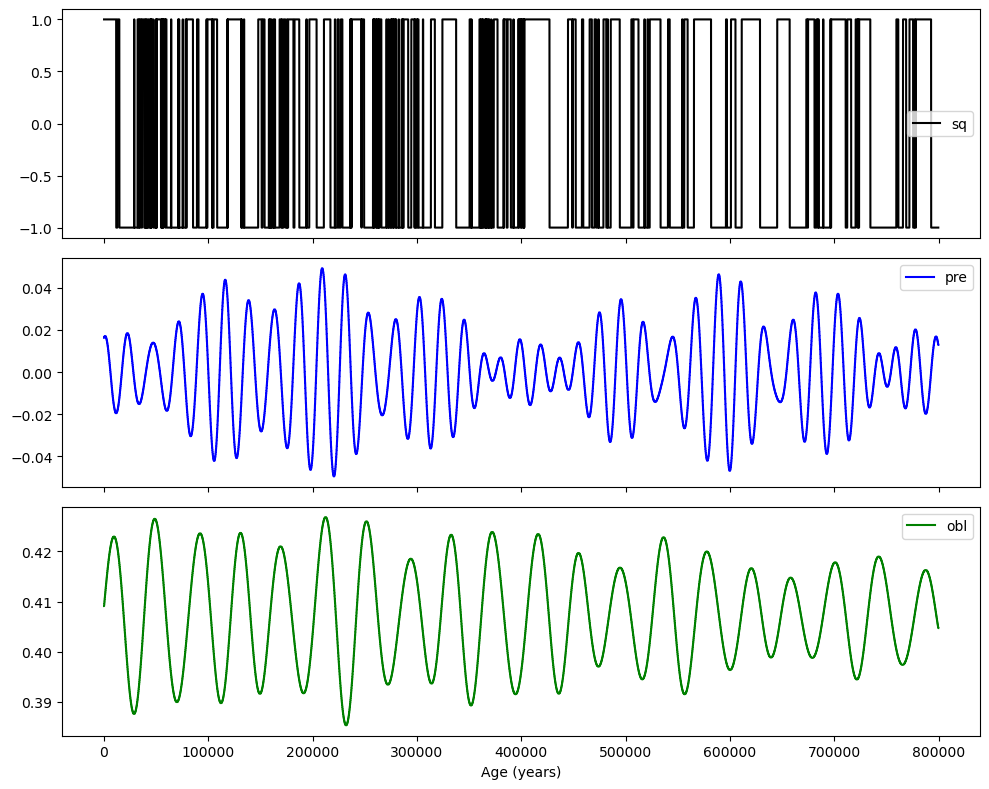

          age   sq
0           0  1.0
1          10  1.0
2          20  1.0
3          30  1.0
4          40  1.0
...       ...  ...
79958  799580 -1.0
79959  799590 -1.0
79960  799600 -1.0
79961  799610 -1.0
79962  799620 -1.0

[79963 rows x 2 columns]
          age      pre
0           0  0.01628
1          10  0.01628
2          20  0.01628
3          30  0.01628
4          40  0.01628
...       ...      ...
79958  799580  0.01288
79959  799590  0.01288
79960  799600  0.01288
79961  799610  0.01288
79962  799620  0.01288

[79963 rows x 2 columns]
Length of df_sq_rs: 79963


In [2]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

df_sq, df_pre, df_obl = sa.interpolate_data_forcing(df_sq, 10, if_plot=True)
print(df_sq)
print(df_pre)
# print the length of df_sq_rs and df_pre_rs
print('Length of df_sq_rs:', len(df_sq))

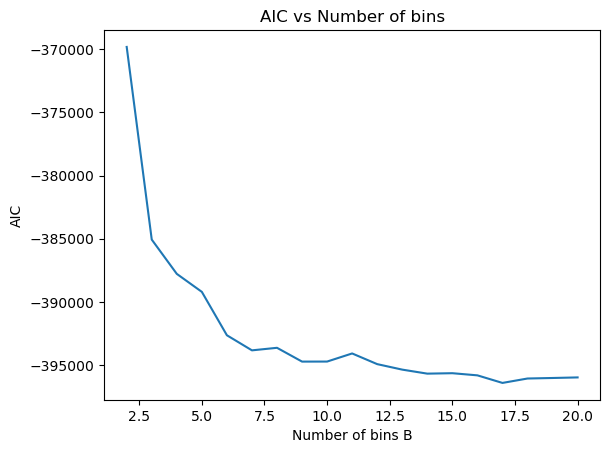

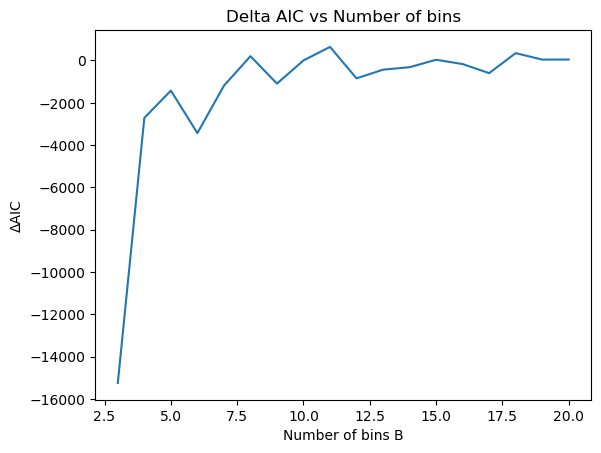

In [3]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

pre = df_pre['pre'].values      # source (precession)

sa.plot_aic_delta(pre)

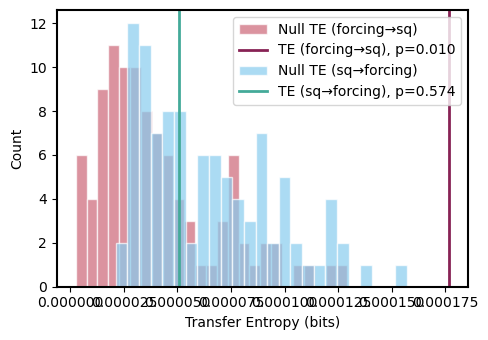

True

In [6]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


pre = df_pre['pre'].values      # source (precession)
sq = df_sq['sq'].values    # target (residual)


result =sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=3)
result

TE(pre→residual) = 0.0003 bits


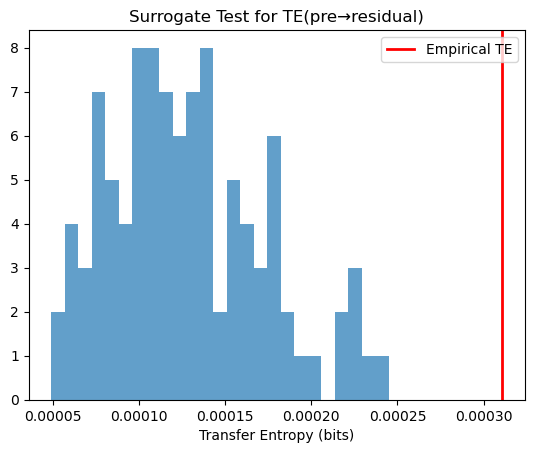

p-value = 0.000


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyinform import transfer_entropy  # correct import! :contentReference[oaicite:0]{index=0}

# — assume df_pre_aligned['pre'] and df_residual['residual'] exist and are same length
x = df_pre['pre'].values      # source (precession)
y = df_sq['sq'].values    # target (residual)

# flip x and y upside down
x = x[::-1]
y = y[::-1]

# 1) Discretize into nbins equiprobable bins
nbins = 8
xbins = np.histogram_bin_edges(x, bins=nbins)
ybins = np.histogram_bin_edges(y, bins=nbins)
x_disc = np.digitize(x, xbins) - 1
y_disc = np.digitize(y, ybins) - 1

# 2) Compute TE from pre→residual with history length k=1
#    note: drop last/first sample to align t→t+1
te_xy = transfer_entropy(x_disc[:-1], y_disc[1:], k=1)
print(f"TE(pre→residual) = {te_xy:.4f} bits")

# 3) Permutation‐based surrogate test
n_surr = 100
te_null = np.zeros(n_surr)
for i in range(n_surr):
    xs = np.random.permutation(x_disc)
    te_null[i] = transfer_entropy(xs[:-1], y_disc[1:], k=1)

# 4) Plot null distribution
plt.hist(te_null, bins=25, alpha=0.7)
plt.axvline(te_xy, color='r', lw=2, label='Empirical TE')
plt.xlabel('Transfer Entropy (bits)')
plt.legend()
plt.title('Surrogate Test for TE(pre→residual)')
plt.show()

# 5) Compute p-value
p_value = np.mean(te_null >= te_xy)
print(f"p-value = {p_value:.3f}")

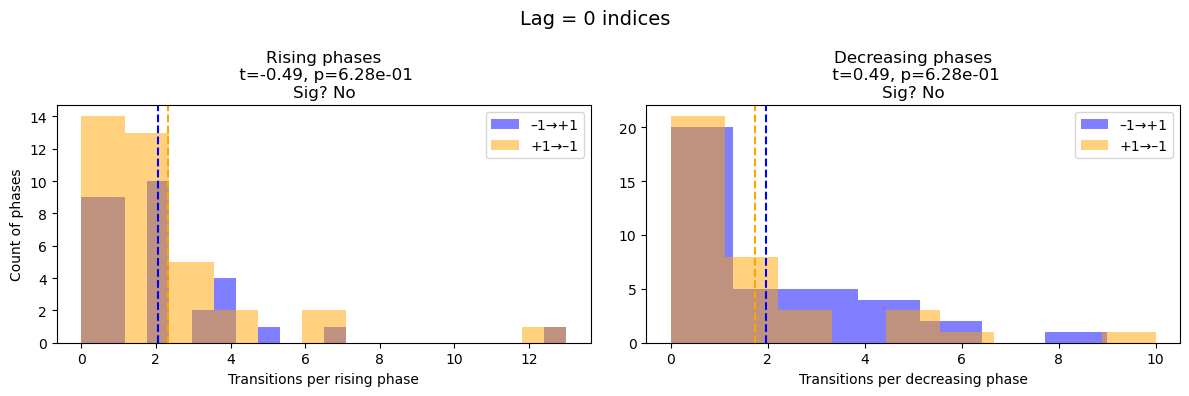

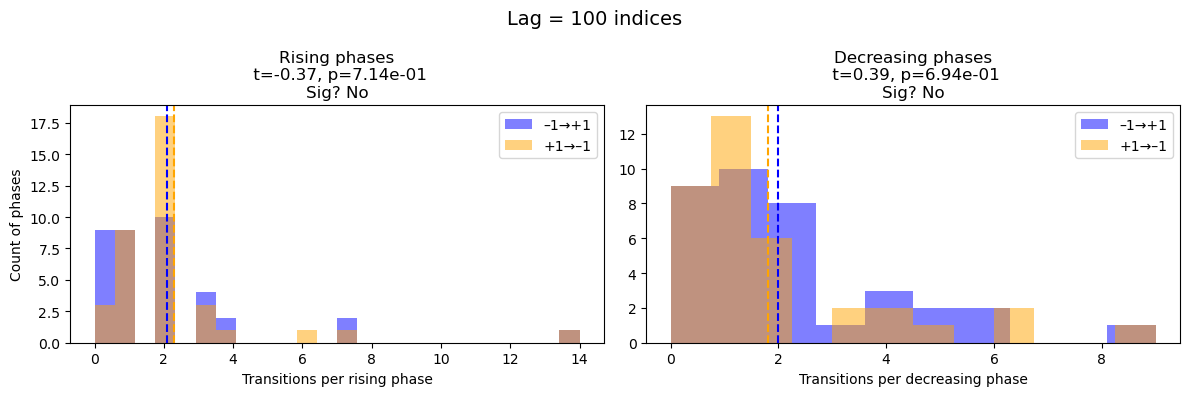

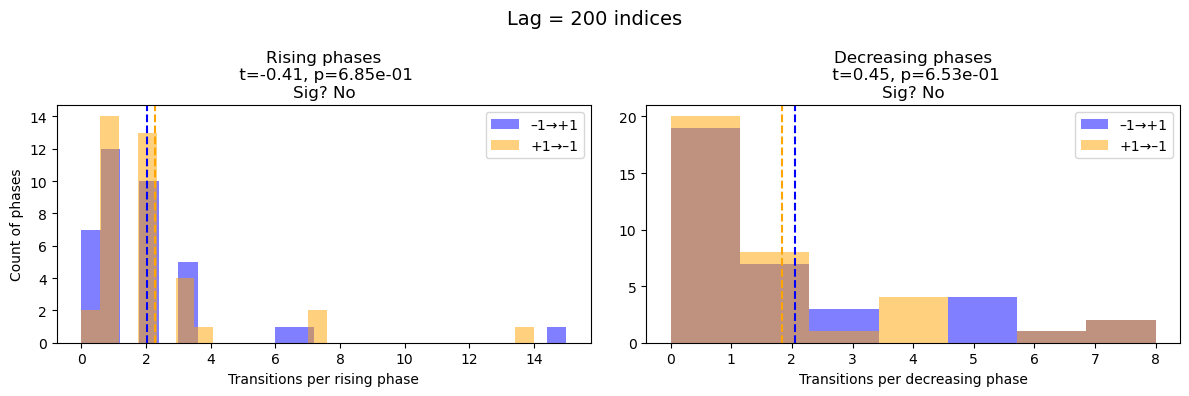

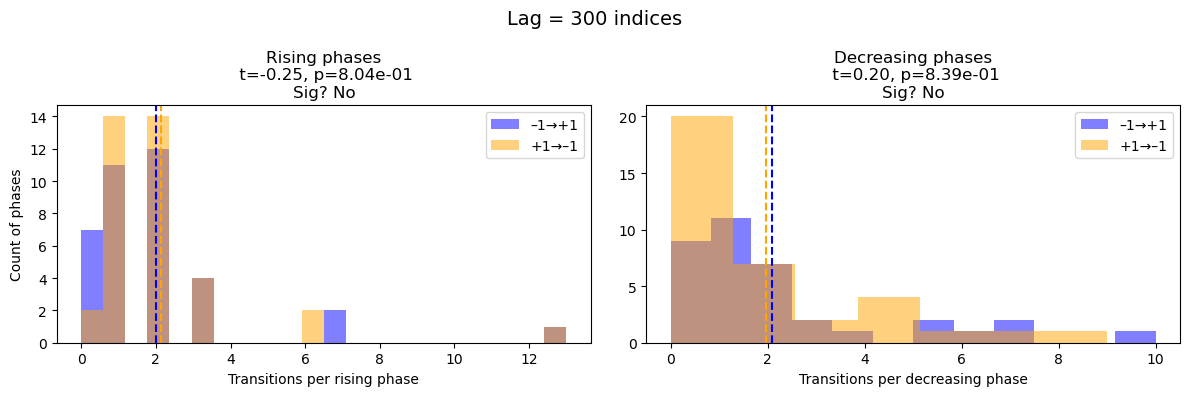

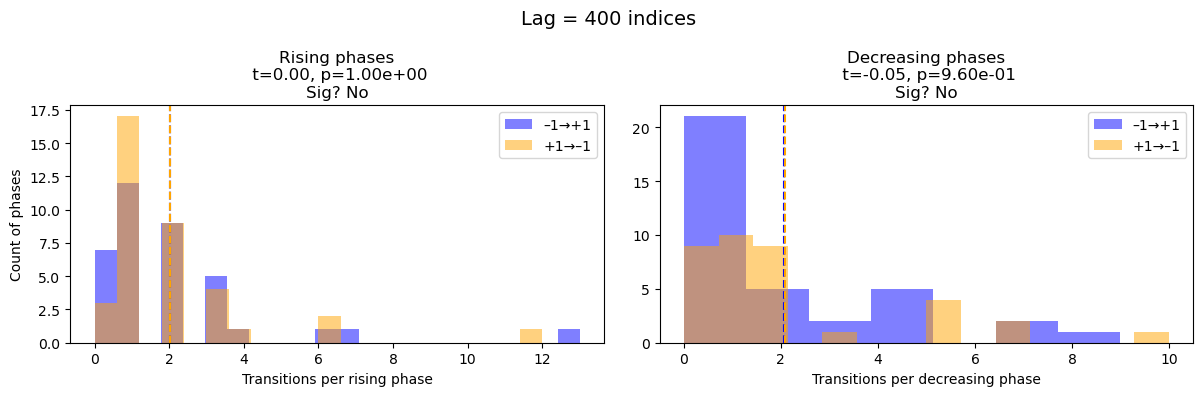

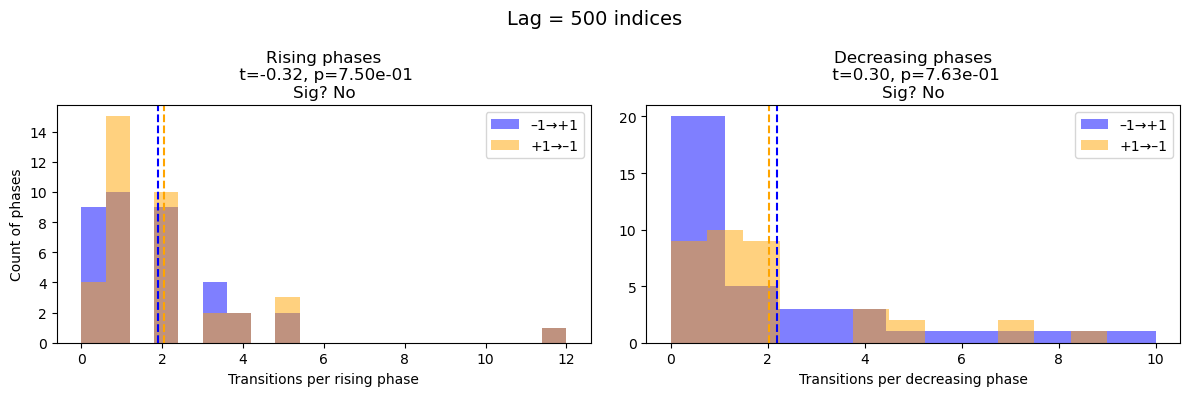

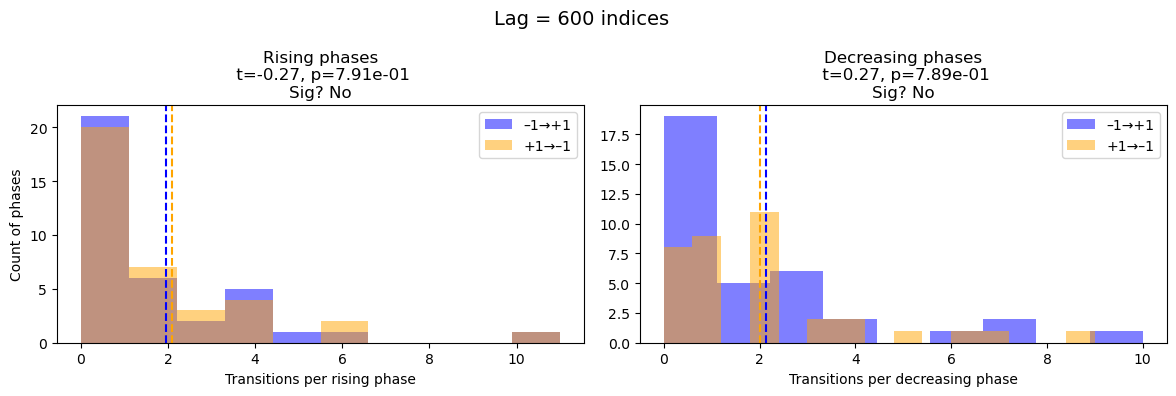

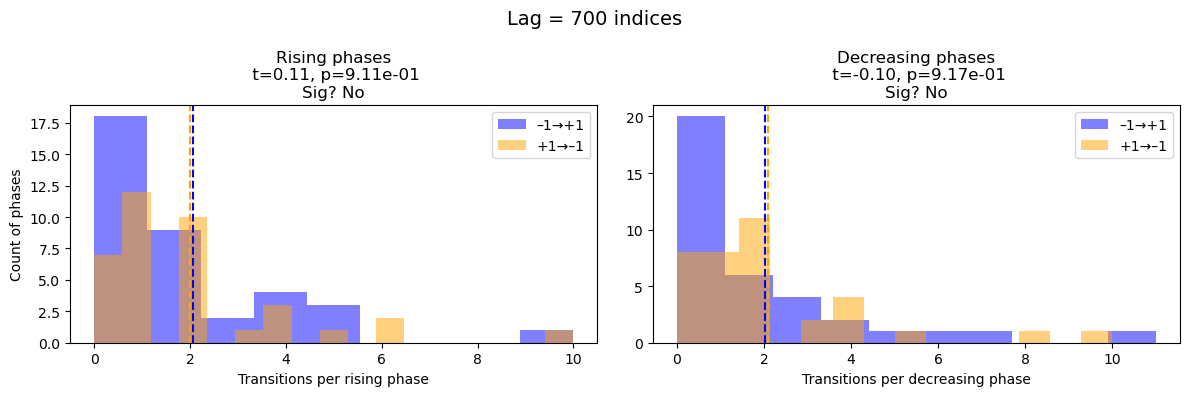

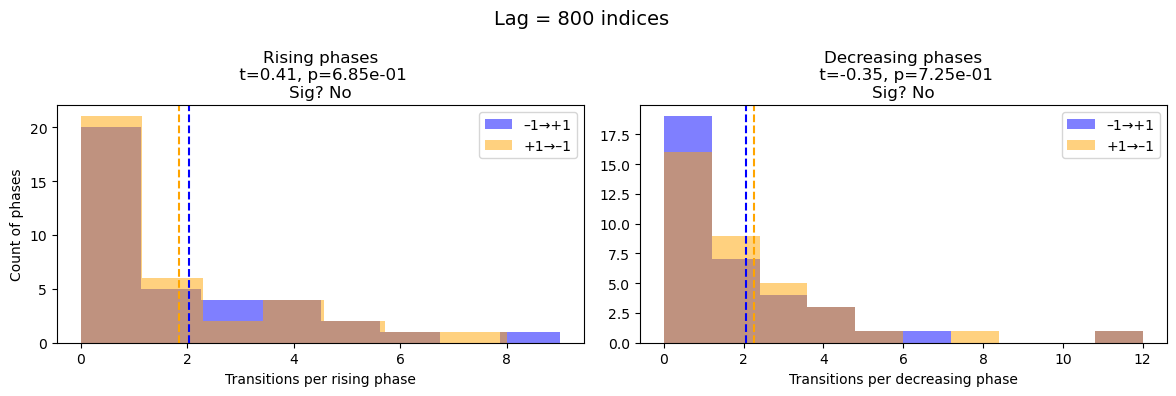

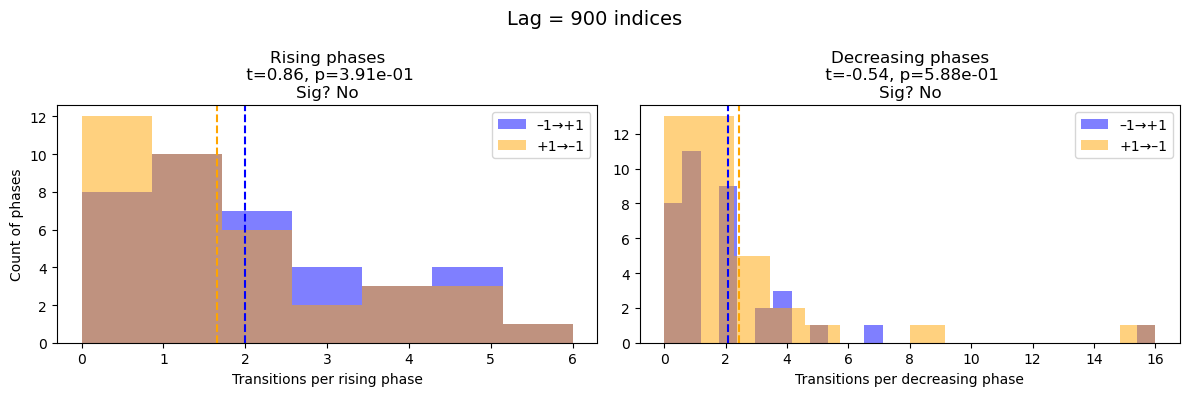

In [19]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

sa.plot_transition_distribution(df_pre, df_sq)

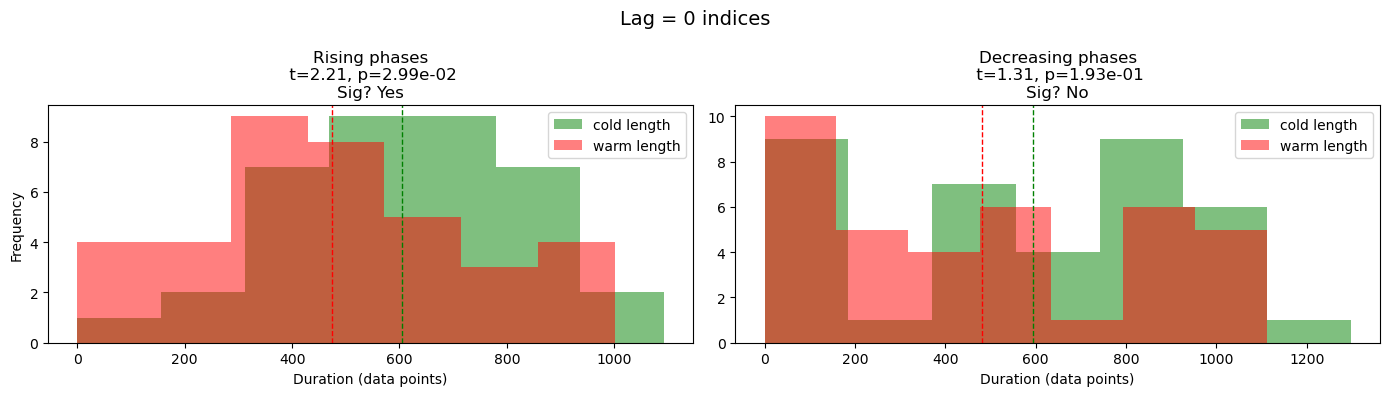

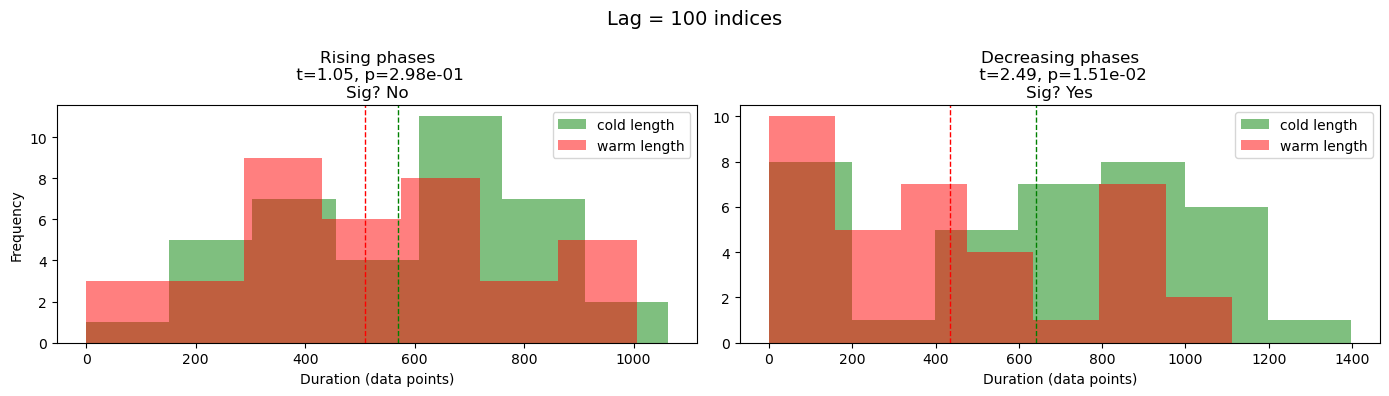

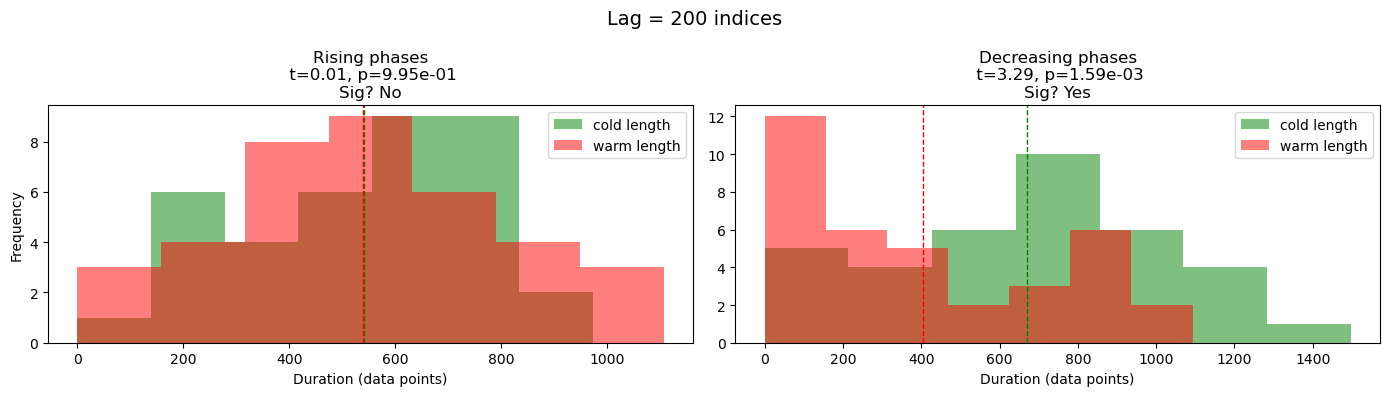

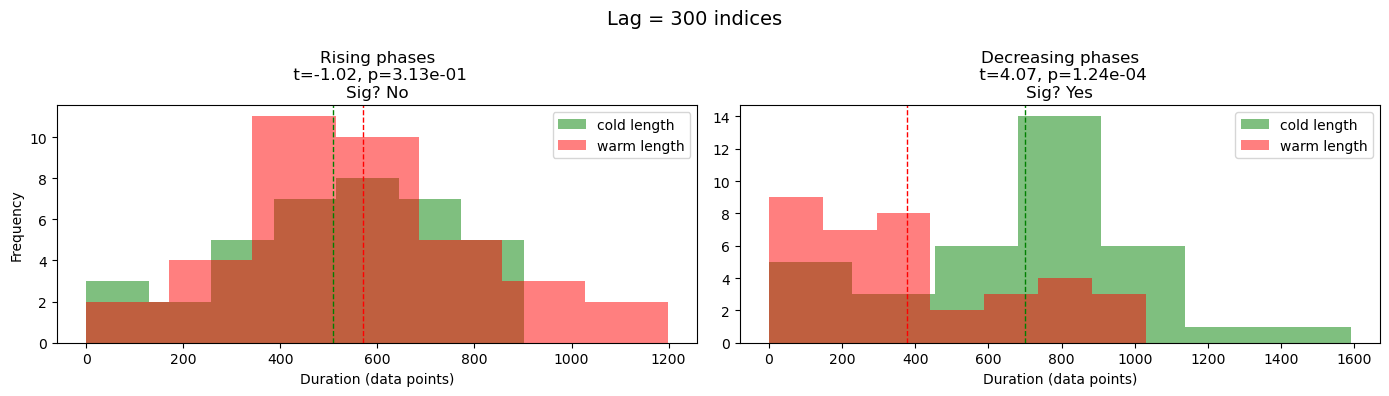

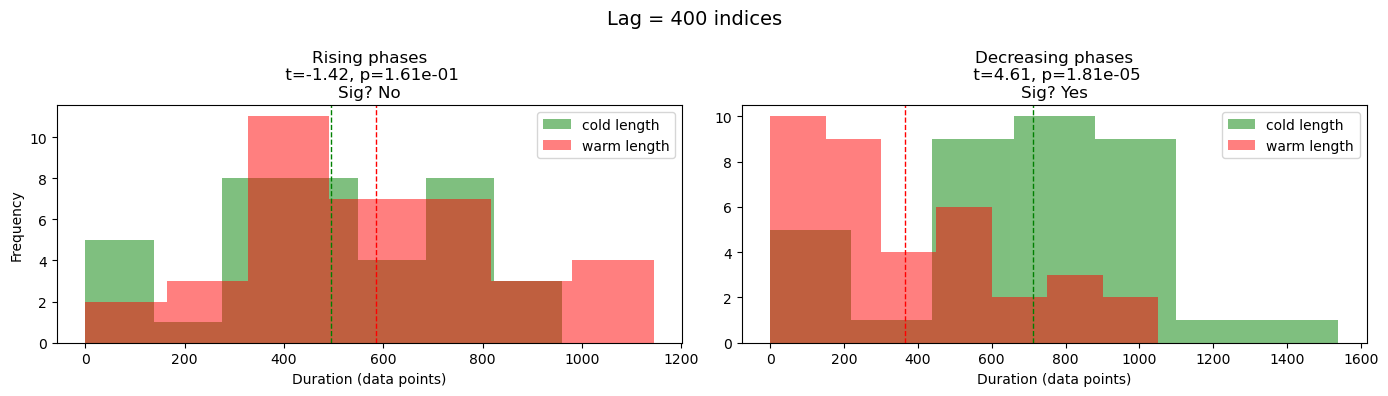

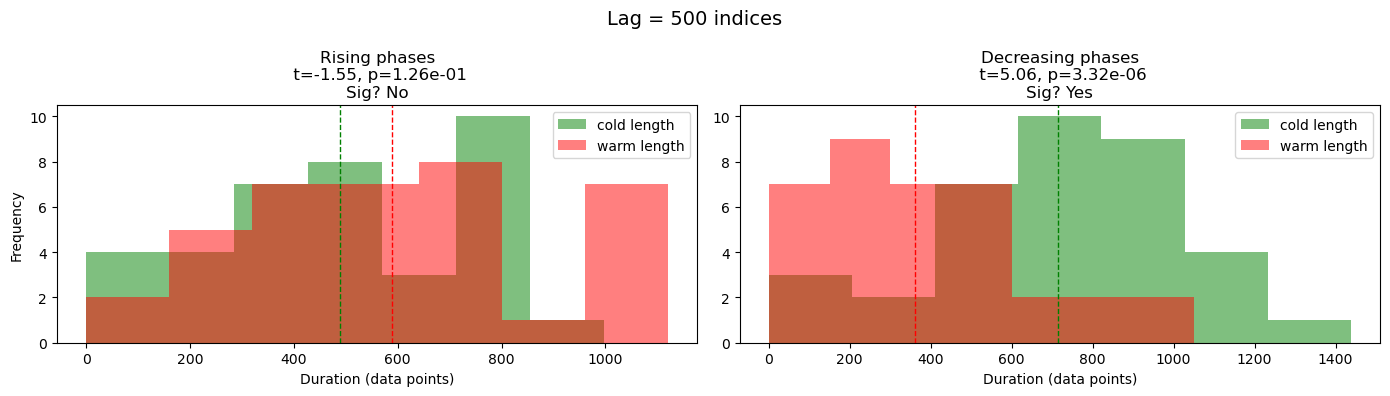

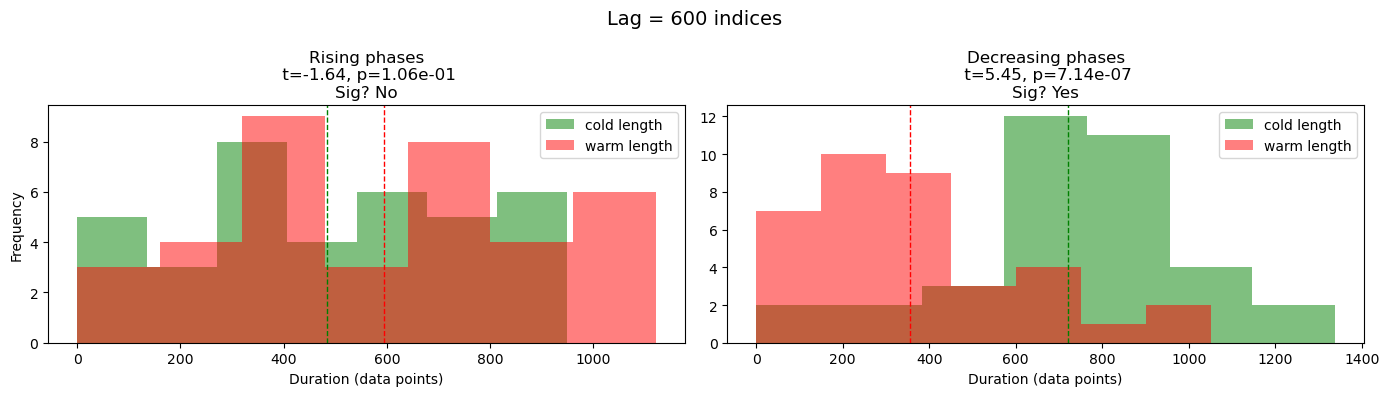

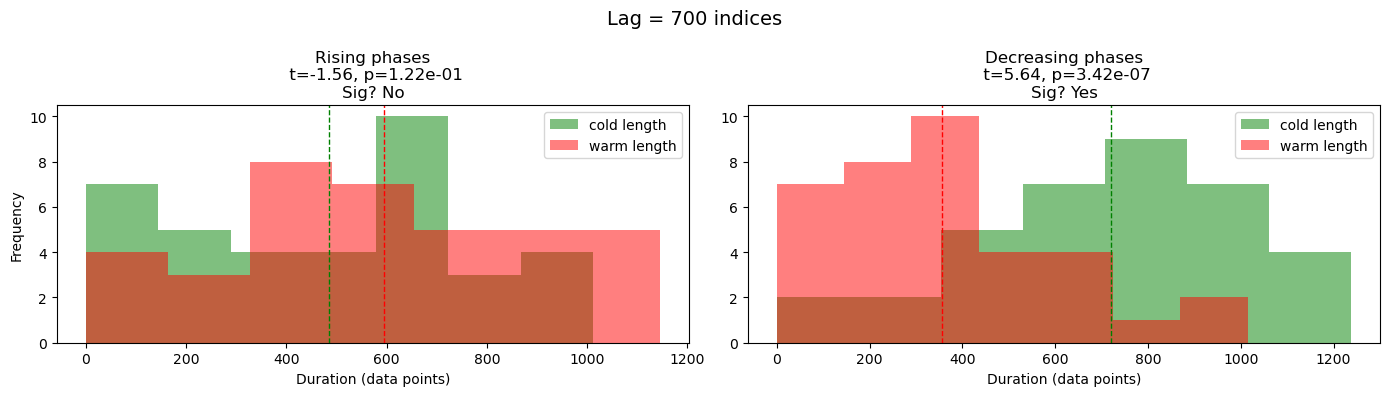

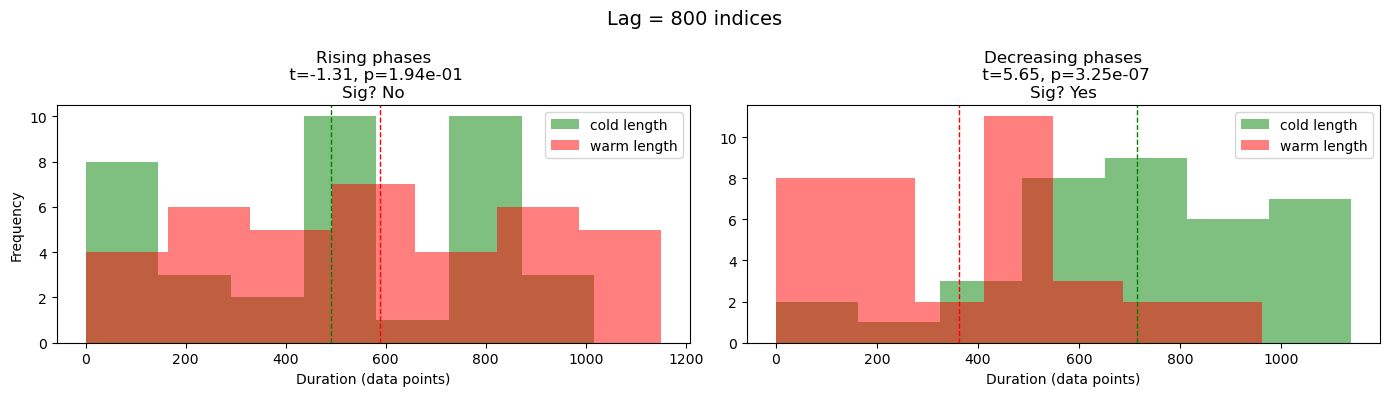

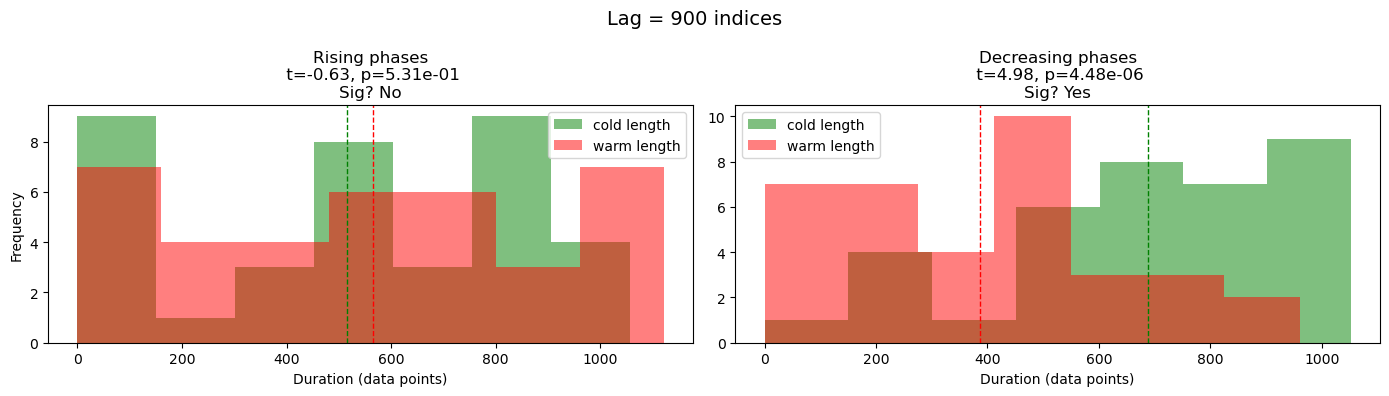

In [5]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

sa.plot_phase_durations(df_pre, df_sq)

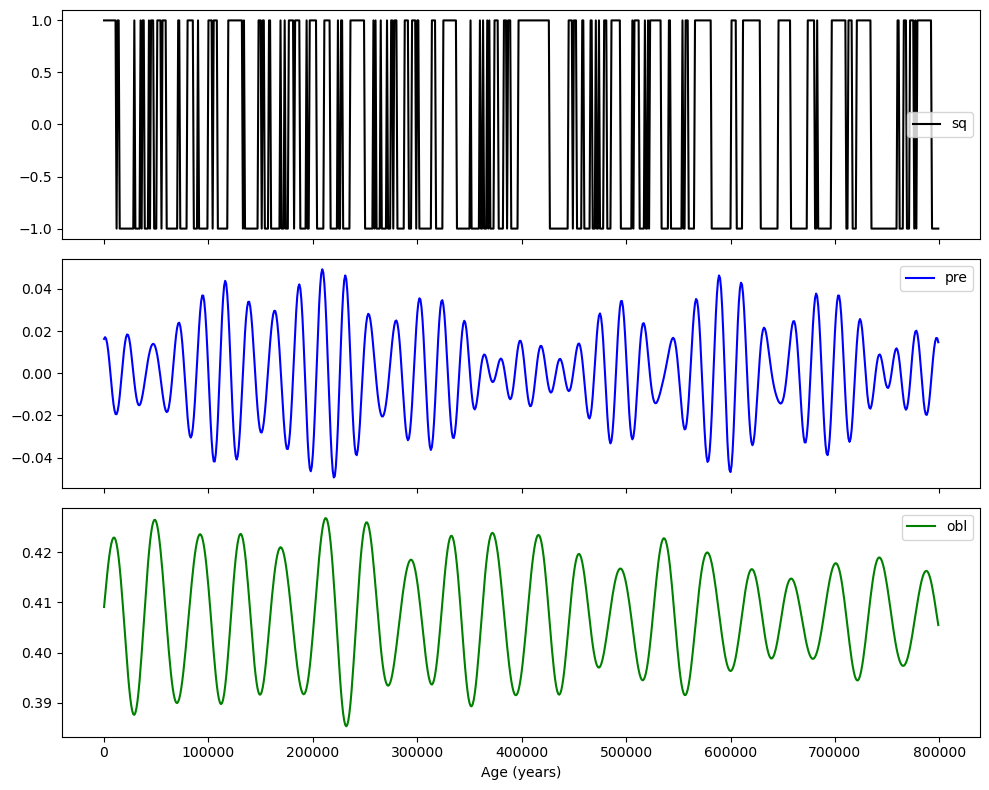

        age   sq
0         0  1.0
1      1000  1.0
2      2000  1.0
3      3000  1.0
4      4000  1.0
..      ...  ...
795  795000 -1.0
796  796000 -1.0
797  797000 -1.0
798  798000 -1.0
799  799000 -1.0

[800 rows x 2 columns]
        age       pre
0         0  0.016280
1      1000  0.017116
2      2000  0.016308
3      3000  0.014018
4      4000  0.010453
..      ...       ...
795  795000  0.011749
796  796000  0.015048
797  797000  0.016748
798  798000  0.016591
799  799000  0.014713

[800 rows x 2 columns]
Length of df_sq_rs: 800


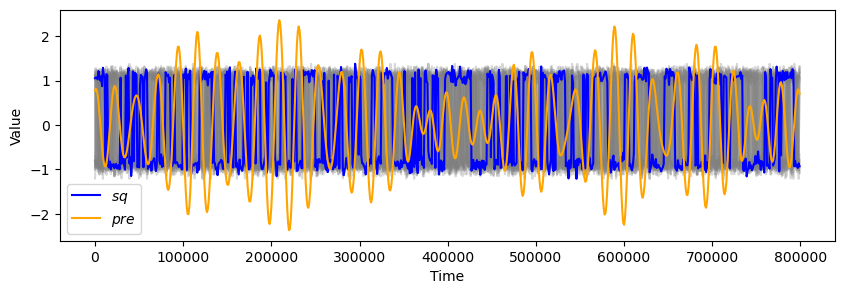

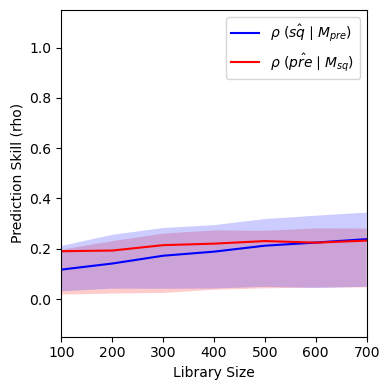

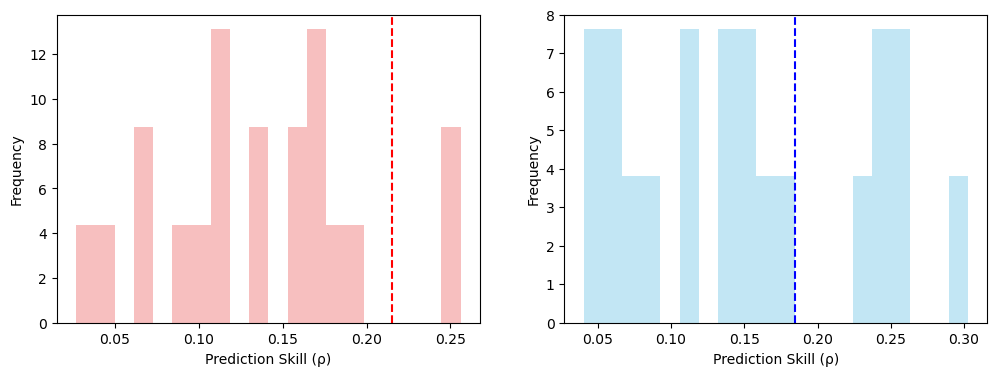

In [52]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

df_sq_rs, df_pre_rs, df_obl_rs = sa.interpolate_data_forcing(df_sq, 1000, if_plot=True)
print(df_sq_rs)
print(df_pre_rs)
# print the length of df_sq_rs and df_pre_rs
print('Length of df_sq_rs:', len(df_sq_rs))



from toolbox import significant_test as st
import importlib
importlib.reload(st)
import numpy as np

# add white noise to df_sq_rs
white_noise = np.random.normal(0, 0.1, len(df_sq_rs['sq'].values))
df_sq_rs_noise = df_sq_rs.copy()
df_sq_rs_noise['sq'] = df_sq_rs_noise['sq'] + white_noise


ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v2(
    df_sq_rs_noise, 
    df_pre_rs,
    E=6, 
    tau=-5, 
    n_ran=20, 
    libSizes="100 200 300 400 500 600 700",
    Tp=0,
    sample=20,
    random=True,
    uni_dir=False,
    showPlot=True)


In [32]:

df_sq.columns[1]

'sq'

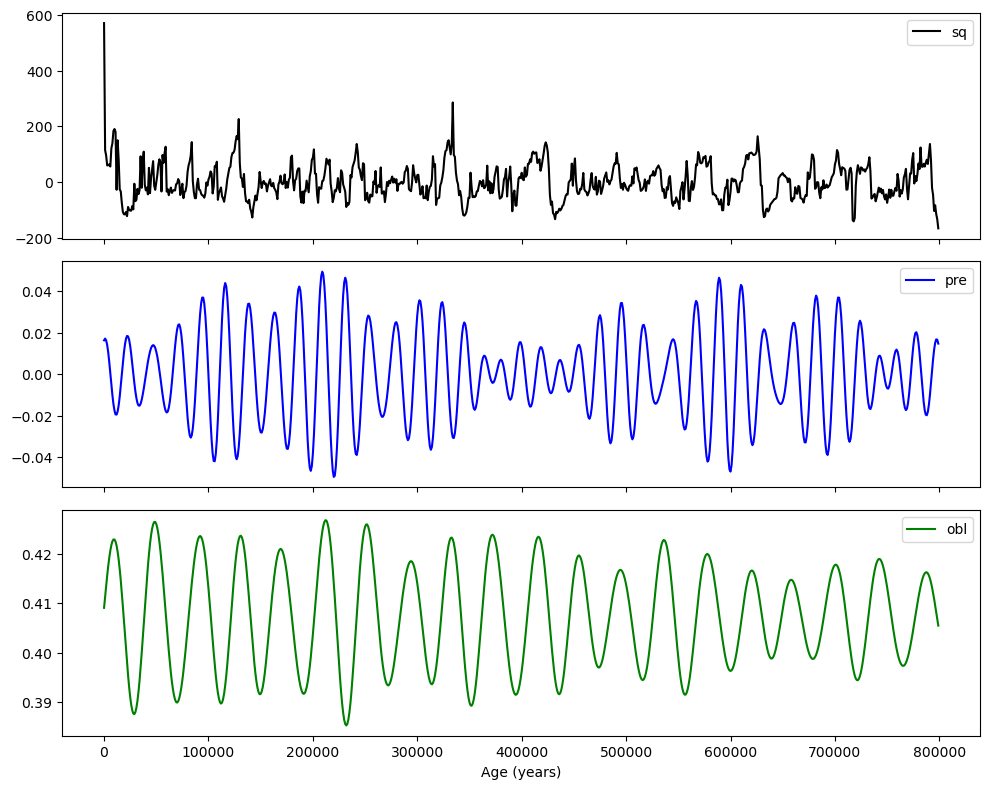

        age         ch4
0         0  570.538837
1      1000  114.631129
2      2000   94.903693
3      3000   59.585356
4      4000   60.056967
..      ...         ...
795  795000 -103.796095
796  796000  -83.645337
797  797000 -114.826634
798  798000 -133.645789
799  799000 -166.440124

[800 rows x 2 columns]
          age      pre
0           0  0.01628
1          10  0.01628
2          20  0.01628
3          30  0.01628
4          40  0.01628
...       ...      ...
79958  799580  0.01288
79959  799590  0.01288
79960  799600  0.01288
79961  799610  0.01288
79962  799620  0.01288

[79963 rows x 2 columns]
Length of df_sq_rs: 800


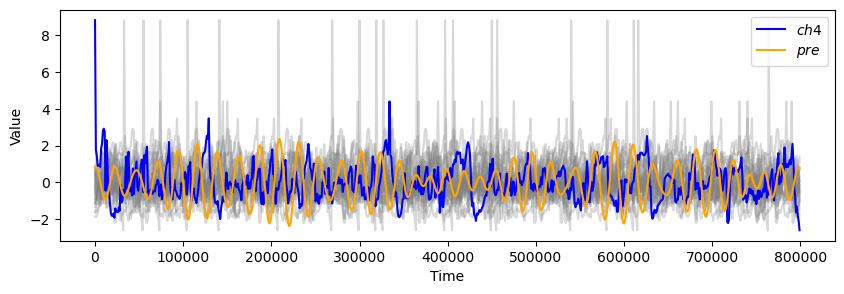

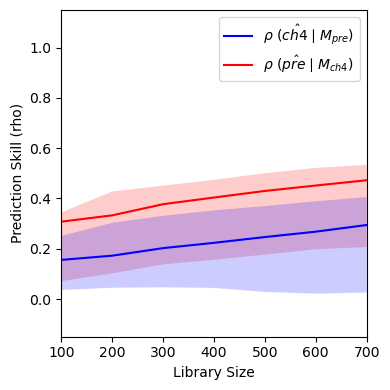

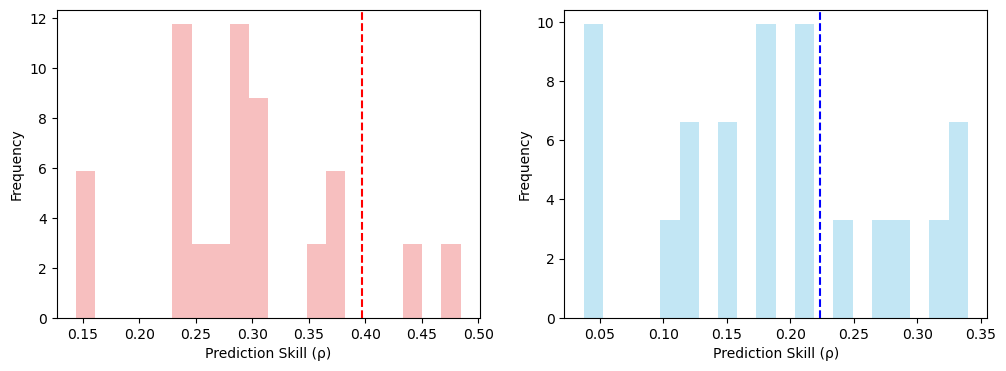

In [42]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

new_df_interp, df_pre_rs, df_obl_rs = sa.interpolate_data_forcing(new_df, 1000, if_plot=True)
print(new_df_interp)
print(df_pre)
# print the length of df_sq_rs and df_pre_rs
print('Length of df_sq_rs:', len(new_df_interp))


from toolbox import significant_test as st
import importlib
importlib.reload(st)
import numpy as np



ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v2(
    new_df_interp, 
    df_pre_rs,
    E=6, 
    tau=-5, 
    n_ran=20, 
    libSizes="100 200 300 400 500 600 700",
    Tp=0,
    sample=20,
    random=True,
    uni_dir=False,
    showPlot=True)


# EDC T in AICC2023, T from Jouzel et al., 2007, data from Thomas

Min age: 43.4
Max age: 799616.2000000001
→ optimal window=1320, threshold lt 0.044, max F1=0.618


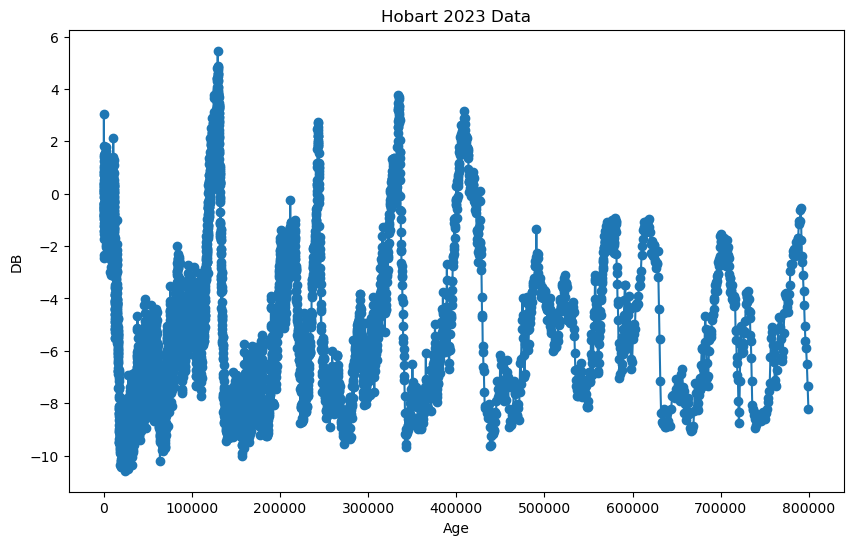

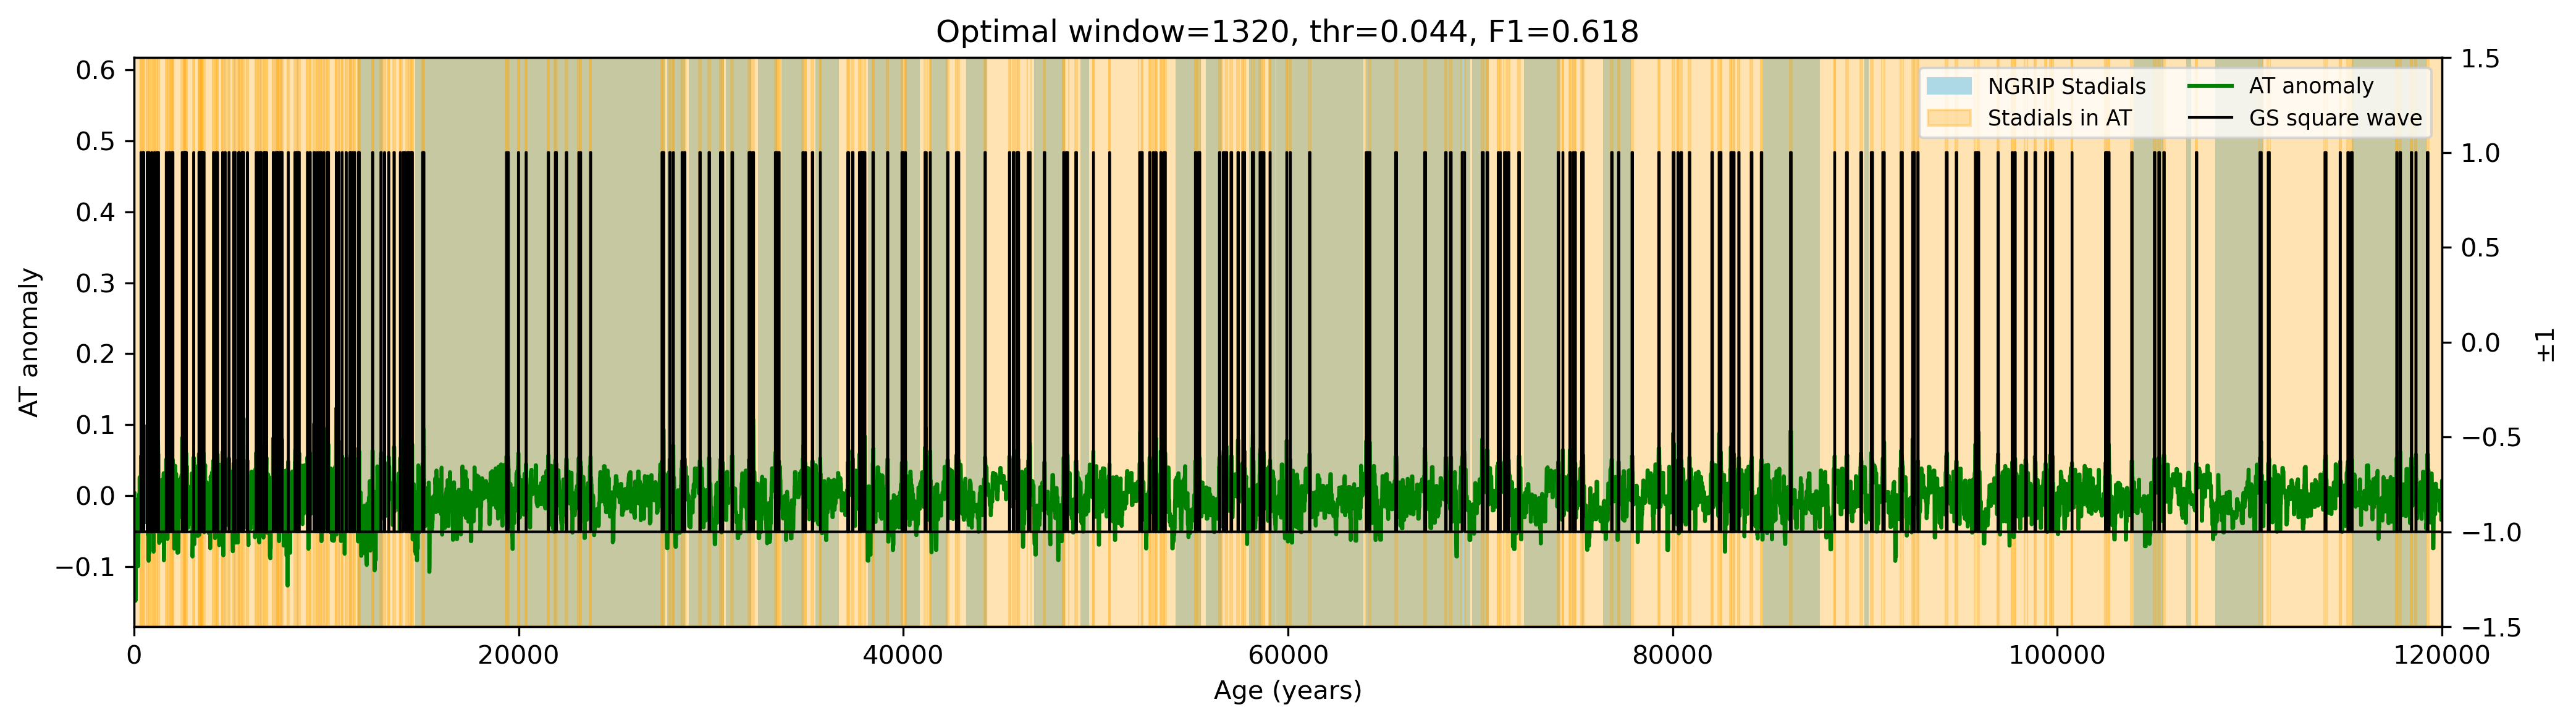

In [29]:
import pandas as pd
import numpy as np

df = pd.read_excel('other_data/EDC_temp_Thomas.xlsx', sheet_name='Sheet1')
# drop nan
df = df.dropna()



# crop the data for age <=800000
df = df[df['age'] <= 800000]

# # linear detrend the column 'DB'
# from scipy import stats
# slope, intercept, r_value, p_value, std_err = stats.linregress(df['age'], df['AT'])
# df['AT'] = df['AT'] - (slope * df['age'] + intercept)

# new_age = np.arange(50, 799611, 10)


# from scipy.interpolate import interp1d
# f_interp = interp1d(df['age'], df['AT'],
#                     kind='nearest',
#                     bounds_error=False,
#                     fill_value=1)
# new_df = pd.DataFrame({'age': new_age,
#                         'AT': f_interp(new_age)})

# # calculate the diff of the column 'AT'
# df['AT'] = df['AT'].diff()
# # drop nan
# df = df.dropna()
# print(df['AT'])

# plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['age'], df['AT'], marker='o', linestyle='-')
plt.title('Hobart 2023 Data')
plt.xlabel('Age')
plt.ylabel('DB')

# print the min and max of age
print('Min age:', df['age'].min())
print('Max age:', df['age'].max())


from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)
import pandas as pd

new_df, df_sq, best = sa.build_DO_sq(df, if_plot=True, age_start=0, age_end=799630, extra_sm=30, dir='lt',diff=True)

# Barker et al., 2022 data

Min age: 75.0
Max age: 799724.4881889763
→ optimal window=4400, threshold gt -0.148, max F1=0.616


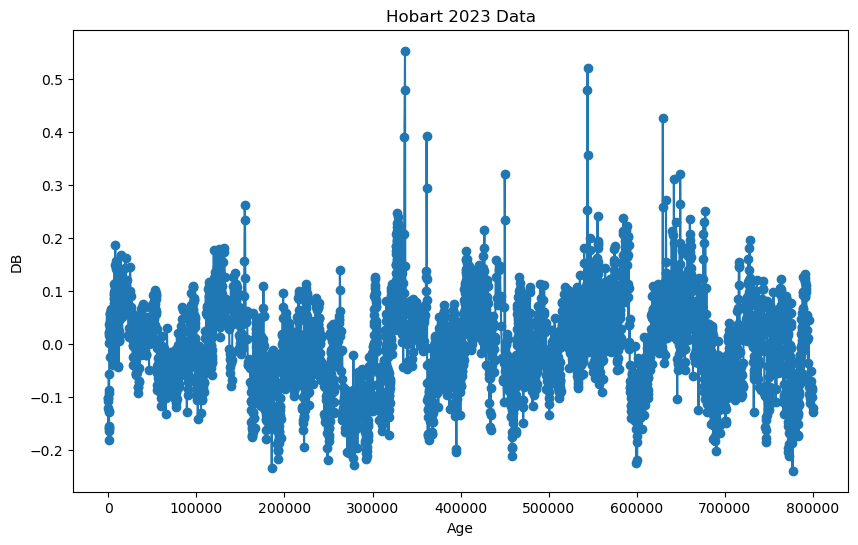

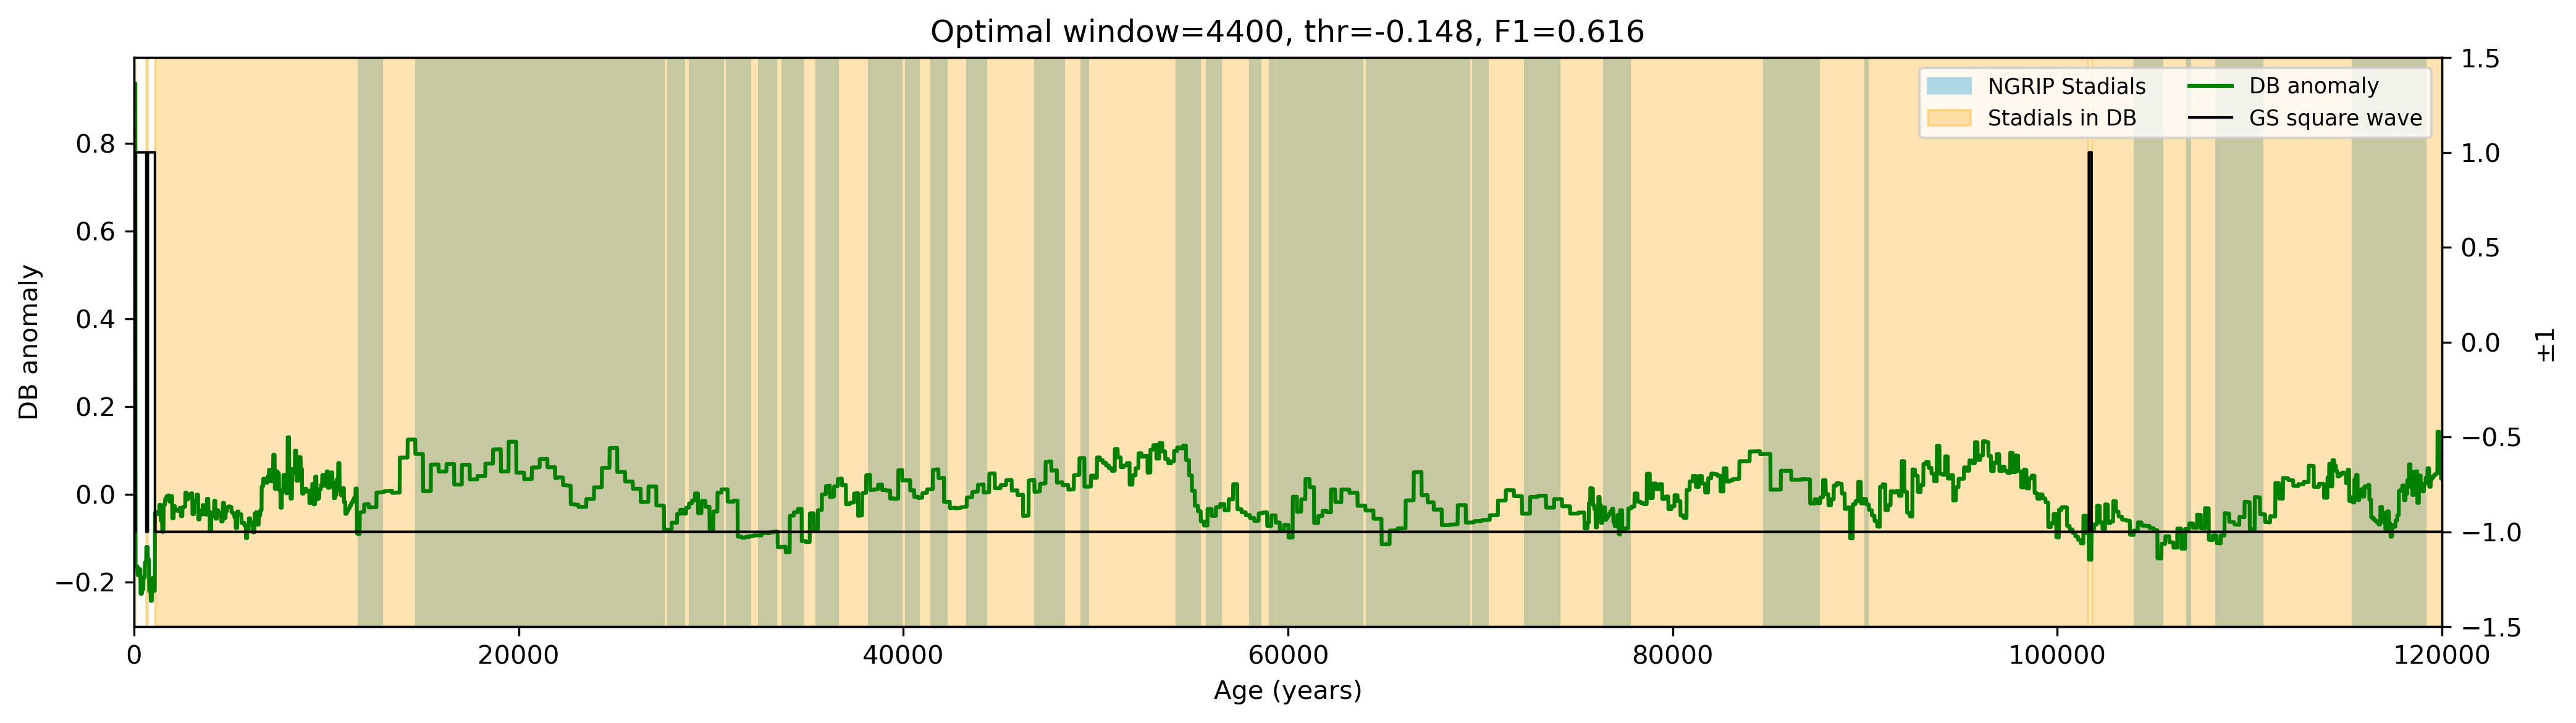

In [43]:
# read 'Hobart_d18O.xlsx' from other_data/
import pandas as pd

df = pd.read_excel('other_data/Barker_2022.xlsx', sheet_name='ODP 983')
df['age'] = df['age']*1000

# crop the data for age <=800000
df = df[df['age'] <= 800000]

# linear detrend the column 'DB'
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['age'], df['DB'])
df['DB'] = df['DB'] - (slope * df['age'] + intercept)

# plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['age'], df['DB'], marker='o', linestyle='-')
plt.title('Hobart 2023 Data')
plt.xlabel('Age')
plt.ylabel('DB')

# print the min and max of age
print('Min age:', df['age'].min())
print('Max age:', df['age'].max())


from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)
import pandas as pd

new_df, df_sq, best = sa.build_DO_sq(df, if_plot=True, age_start=0, age_end=799630, dir='gt')

Min age: 0.0
Max age: 799523.0
→ optimal window=13100, threshold gt -0.161, max F1=0.685


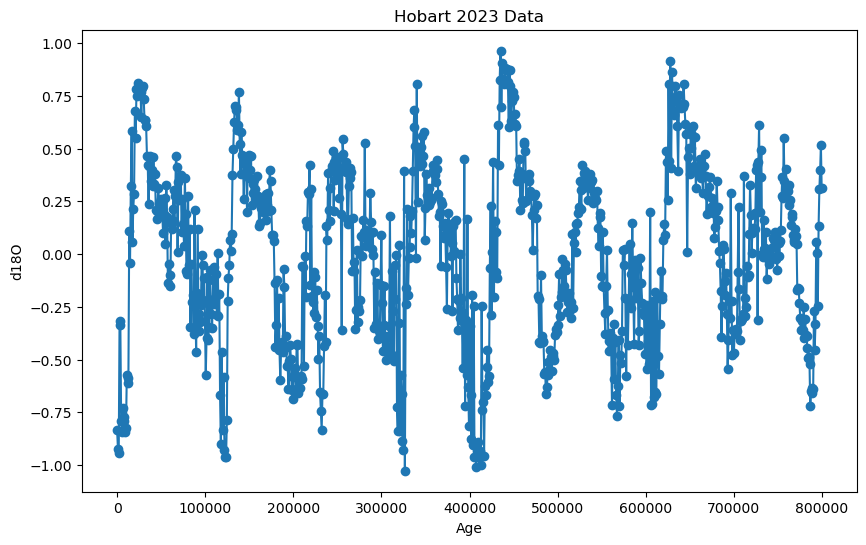

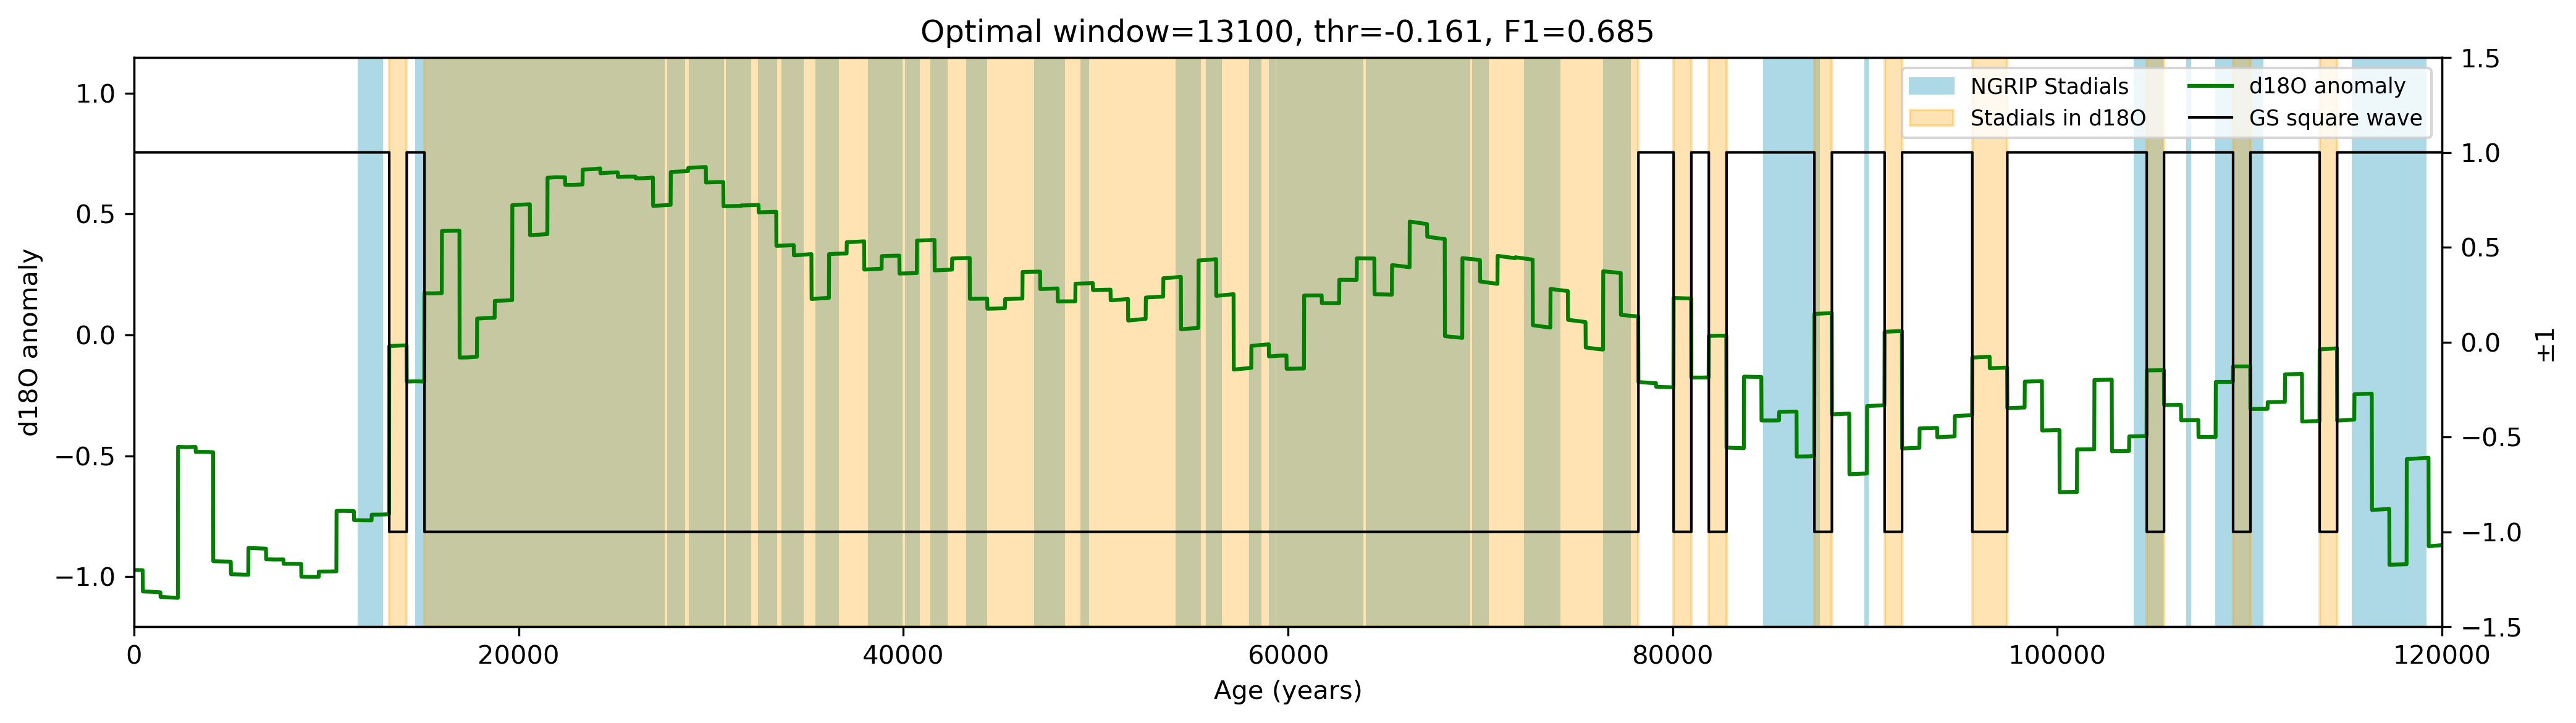

In [44]:
# read 'Hobart_d18O.xlsx' from other_data/
import pandas as pd

df = pd.read_excel('other_data/Barker_2022.xlsx', sheet_name='IODP U1476')
df['age'] = df['age']*1000

# crop the data for age <=800000
df = df[df['age'] <= 800000]

# linear detrend the column 'DB'
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['age'], df['d18O'])
df['d18O'] = df['d18O'] - (slope * df['age'] + intercept)

# plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['age'], df['d18O'], marker='o', linestyle='-')
plt.title('Hobart 2023 Data')
plt.xlabel('Age')
plt.ylabel('d18O')

# print the min and max of age
print('Min age:', df['age'].min())
print('Max age:', df['age'].max())


from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)
import pandas as pd

new_df, df_sq, best = sa.build_DO_sq(df, if_plot=True, age_start=0, age_end=799630, dir='gt')

# Hobart data

Min age: 0.0
Max age: 654000.0
→ optimal window=14400, threshold gt -0.097, max F1=0.718


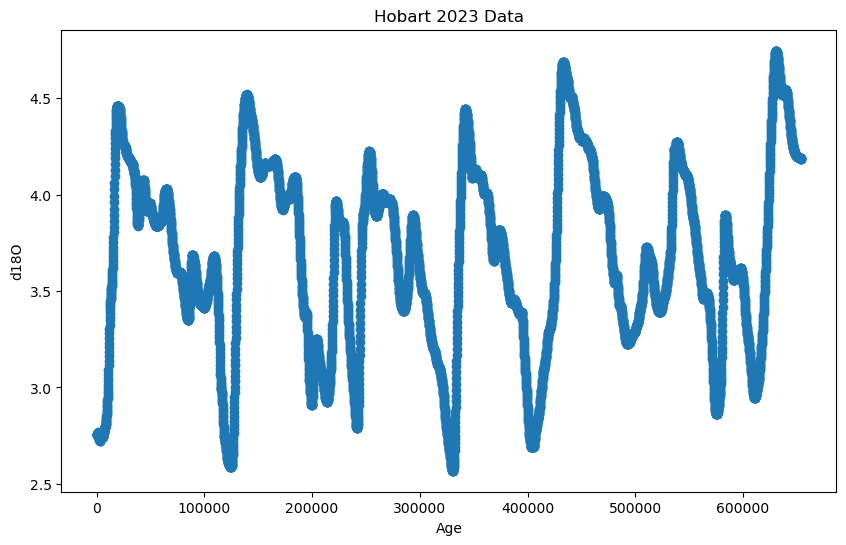

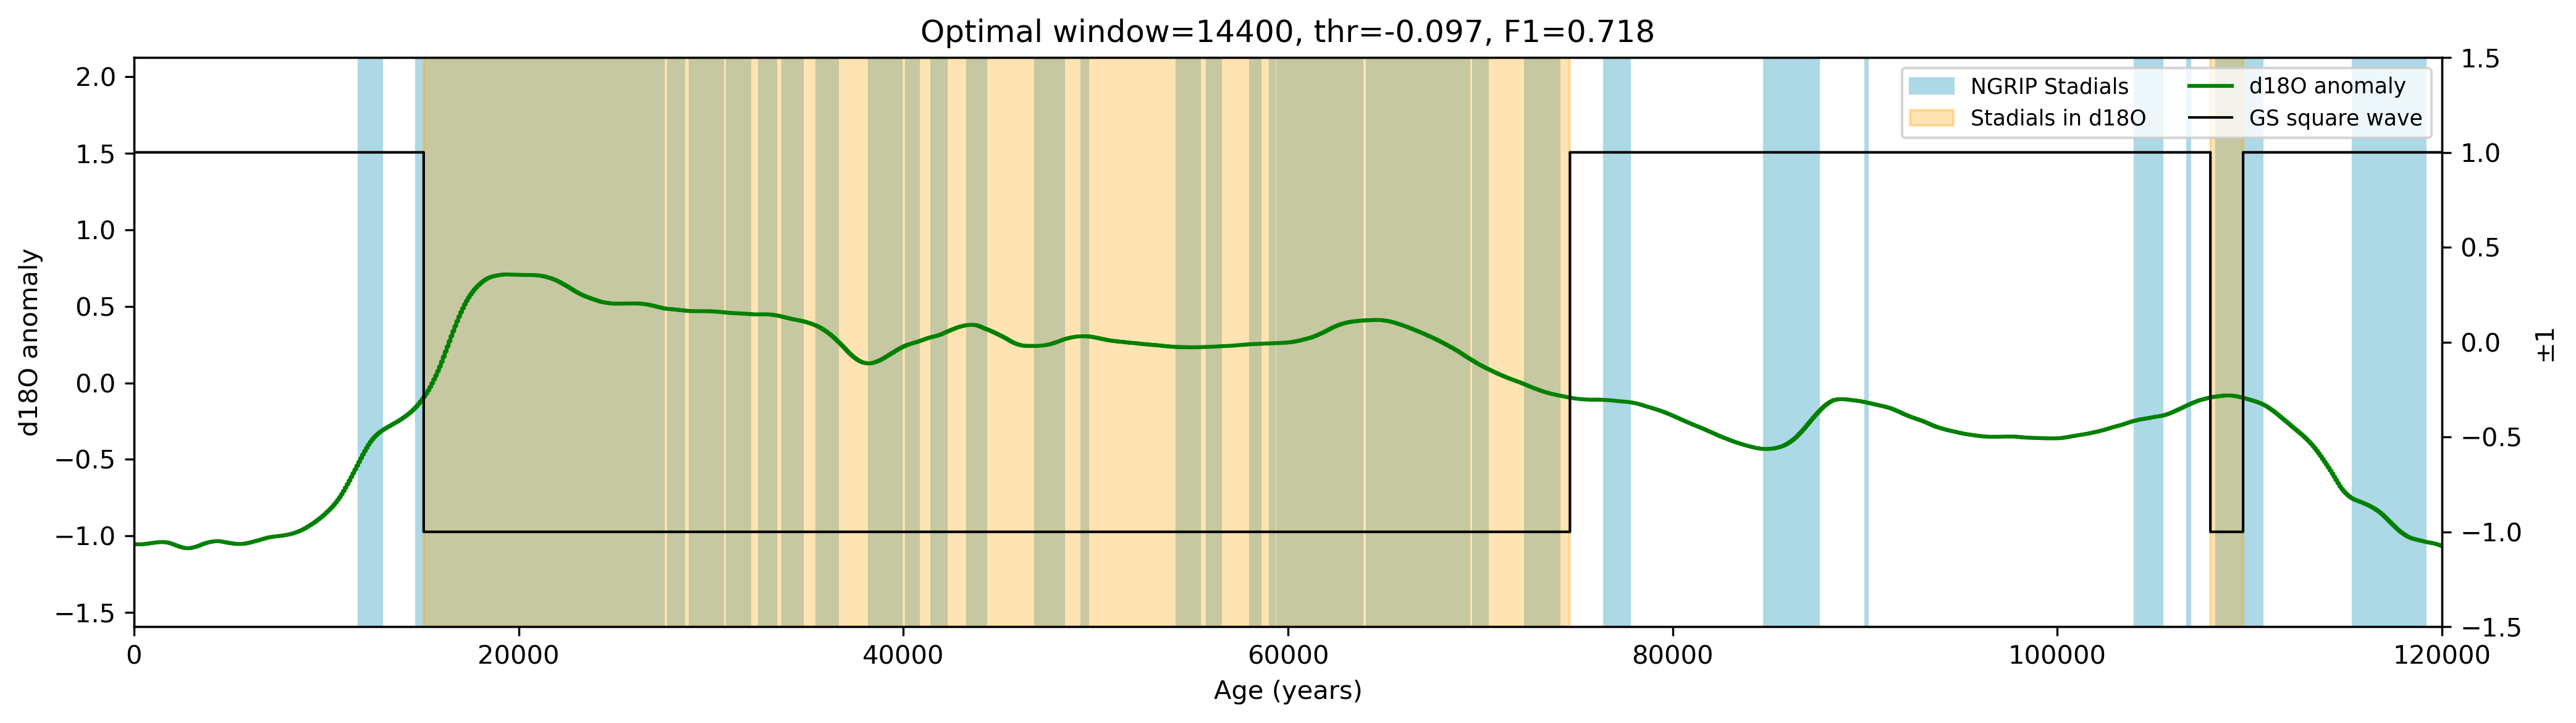

In [45]:
# read 'Hobart_d18O.xlsx' from other_data/
import pandas as pd

df = pd.read_excel('other_data/Hobart_d18O.xlsx', sheet_name='Sheet1')
df['age'] = df['age']*1000

# plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['age'], df['d18O'], marker='o', linestyle='-')
plt.title('Hobart 2023 Data')
plt.xlabel('Age')
plt.ylabel('d18O')

# print the min and max of age
print('Min age:', df['age'].min())
print('Max age:', df['age'].max())


from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)
import pandas as pd

new_df, df_sq, best = sa.build_DO_sq(df, if_plot=True, age_start=0, age_end=799630, dir='gt')